#  采用传统的机器学习方法来进行房价预测


# baseline 最简单的方式来搭建模型

In [85]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mpl

mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.family']='sans-serif'

In [86]:
train_data = pd.read_csv("data/train.csv")

<font color=red>可以看出除了 saleprice之外 还有80个feature，其中:<br>
    *Alley<br>
    *MasVnrType<br>
    *MasVnrArea<br>
    *BsmtQual<br>
    *BsmtCond<br>         
    *BsmtExposure<br>   
    *BsmtFinType1<br> 
    *BsmtFinType2<br>
    *Electrical<br>
    *GarageType<br>       
    *GarageYrBlt<br>  
    *GarageFinish<br> 
    *PoolQC<br>         
    *Fence<br>       
    *MiscFeature<br>   
    
    等几项数据有缺失

In [87]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

首先看一下房价的分布

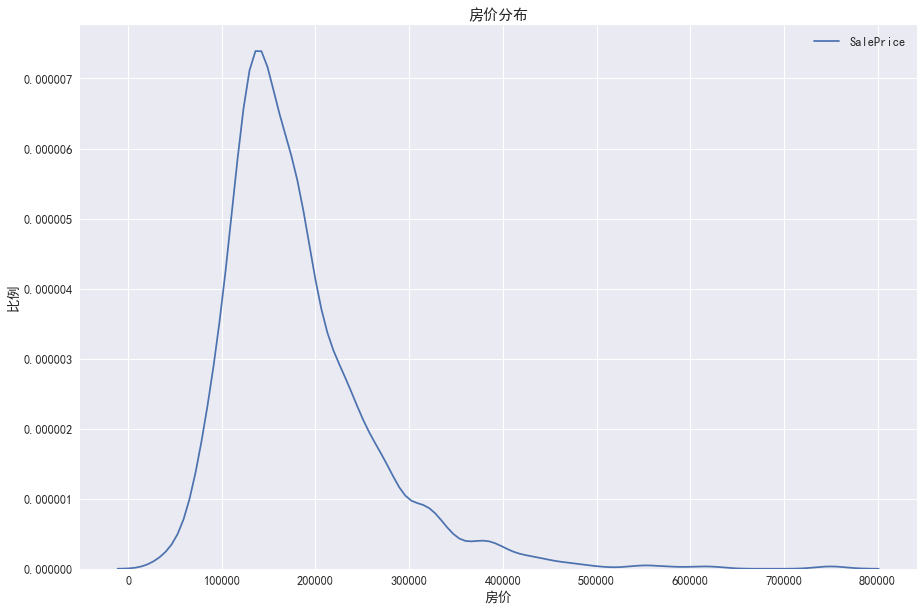

In [88]:
houseprice = train_data['SalePrice']
fig = plt.figure(figsize=(15,10))
plt.title(u'房价分布')
plt.xlabel(u'房价')
plt.ylabel(u'比例')

sns.kdeplot(houseprice)

首先进行缺失值的处理，看看各个缺失值对房价的影响

In [89]:
na_count = train_data.isnull().sum().sort_values(ascending =False)
na_rate  = na_count / train_data.shape[0]
na_sample = pd.DataFrame({'count':na_count,'rate':na_rate})

<font color=red> 一共有19个变量有缺失，首先看看各个变量对price的影响

In [114]:
na_sample.head(20)

,count,rate
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


绘制散点图 看看相关性

In [91]:
have_na = train_data.loc[:,train_data.isnull().sum()!=0]
have_na = pd.concat([have_na,train_data['SalePrice']],axis = 1)

首先看看协方差 各个数据的
<font color=red> 可以看出以上3个量和房价呈现 轻微正相关性
    可以考虑使用机器学习方法填充缺失数据

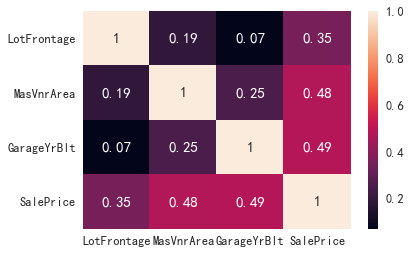

In [92]:
sns.heatmap(have_na.corr(),annot=True)

# 1、PoolQc/MiscFeature/Alley/Fence缺失值 太多 考虑丢弃本条数据

# 2、FireplaceQu  暂时可以看出 带有Ex标签的房价均价偏高

In [93]:
FireplaceQu_Data = have_na[['FireplaceQu','SalePrice']].groupby(['FireplaceQu'],as_index = False).mean()

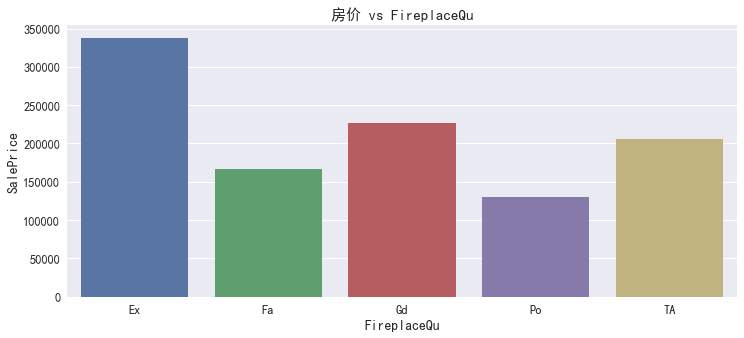

In [94]:
plt.figure(figsize=(12,5))
plt.xlabel('FireplaceQu')
plt.ylabel(u'房价')
plt.title(u'房价 vs FireplaceQu')

sns.barplot(x= 'FireplaceQu',y = 'SalePrice',data = FireplaceQu_Data)

# 3、LotFrontage 散点图(考虑丢弃)

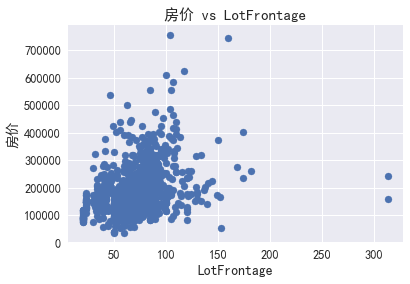

In [95]:
fig ,ax = plt.subplots()
plt.xlabel('LotFrontage')
plt.ylabel(u'房价')
plt.title(u'房价 vs LotFrontage')

ax.scatter(x = have_na['LotFrontage'],y=have_na['SalePrice'])
plt.show()

# 4、GarageCond(好像并没什么关系, EX平均价格还比价低  考虑丢弃) 

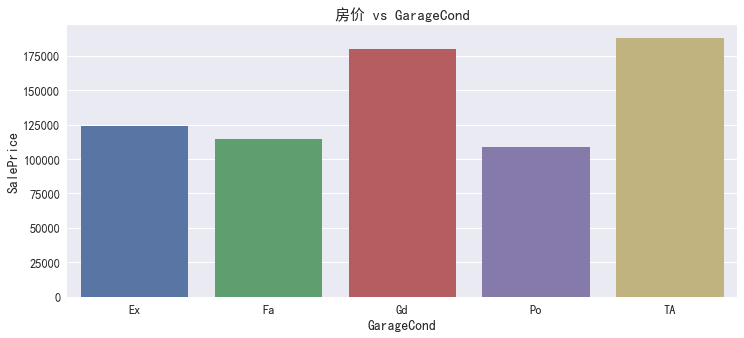

In [96]:
GarageCond_Data = have_na[['GarageCond','SalePrice']].groupby(['GarageCond'],as_index = False).mean()


plt.figure(figsize=(12,5))
plt.xlabel('GarageCond')
plt.ylabel(u'房价')
plt.title(u'房价 vs GarageCond')

sns.barplot(x= 'GarageCond',y = 'SalePrice',data = GarageCond_Data)

# 5、GarageType
(好像并没什么关系, EX平均价格还比价低  考虑丢弃) 

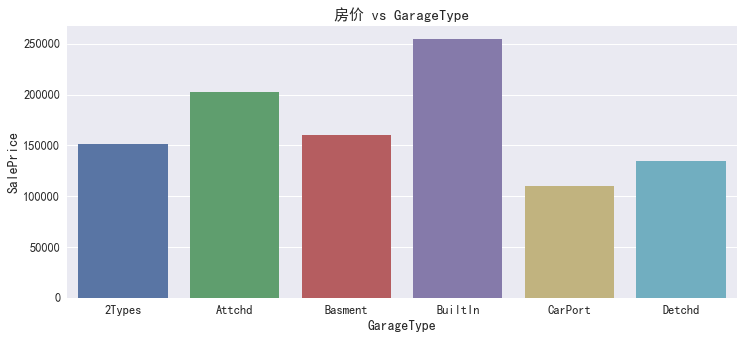

In [97]:
GarageType_Data = have_na[['GarageType','SalePrice']].groupby(['GarageType'],as_index = False).mean()


plt.figure(figsize=(12,5))
plt.xlabel('GarageType')
plt.ylabel(u'房价')
plt.title(u'房价 vs GarageType')

sns.barplot(x= 'GarageType',y = 'SalePrice',data = GarageType_Data)

# 6、GarageYrBlt

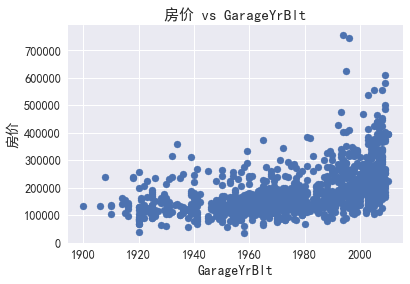

In [98]:
fig ,ax = plt.subplots()
plt.xlabel('GarageYrBlt')
plt.ylabel(u'房价')
plt.title(u'房价 vs GarageYrBlt')

ax.scatter(x = have_na['GarageYrBlt'],y=have_na['SalePrice'])
plt.show()


# GarageFinish  (NA表示没有车库）
  需要保留，可以看出车库完成度和价格成正比
  Fin>Rfn>Uf>NAN
 

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


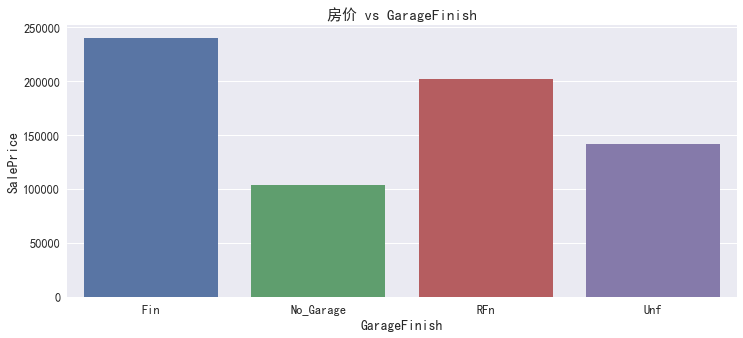

In [99]:
GarageFinish_Data = have_na[['GarageFinish','SalePrice']]
GarageFinish_Data.loc[GarageFinish_Data.GarageFinish.isnull(),'GarageFinish'] = 'No_Garage'
GarageFinish_Data = GarageFinish_Data.groupby(['GarageFinish'],as_index = False).mean()


plt.figure(figsize=(12,5))
plt.xlabel('GarageFinish')
plt.ylabel(u'房价')
plt.title(u'房价 vs GarageFinish')

sns.barplot(x= 'GarageFinish',y = 'SalePrice',data = GarageFinish_Data)

# GarageQual(车库质量)

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


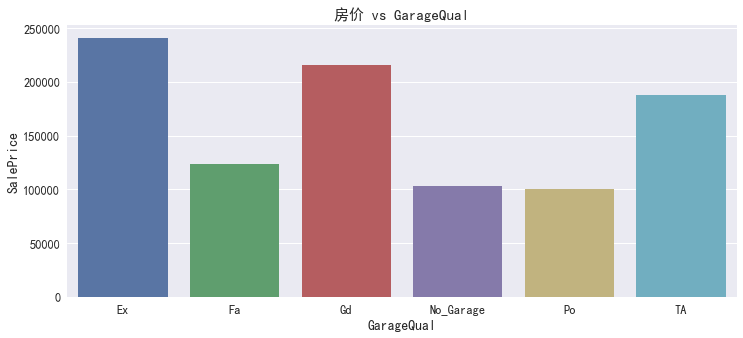

In [100]:
GarageQual = have_na[['GarageQual','SalePrice']]
GarageQual.loc[GarageQual.GarageQual.isnull(),'GarageQual'] = 'No_Garage'
GarageQual = GarageQual.groupby(['GarageQual'],as_index = False).mean()


plt.figure(figsize=(12,5))
plt.xlabel('GarageQual')
plt.ylabel(u'房价')
plt.title(u'房价 vs GarageQual')

sns.barplot(x= 'GarageQual',y = 'SalePrice',data = GarageQual)

#  BsmtExposure

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


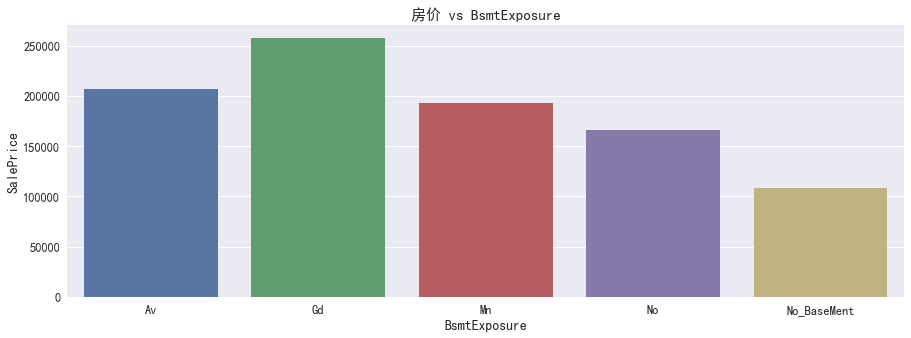

In [101]:
BsmtExposure = have_na[['BsmtExposure','SalePrice']]
BsmtExposure.loc[BsmtExposure.BsmtExposure.isnull(),'BsmtExposure'] = 'No_BaseMent'
BsmtExposure = BsmtExposure.groupby(['BsmtExposure'],as_index = False).mean()


plt.figure(figsize=(15,5))
plt.xlabel('BsmtExposure')
plt.ylabel(u'房价')
plt.title(u'房价 vs BsmtExposure')

sns.barplot(x= 'BsmtExposure',y = 'SalePrice',data = BsmtExposure)

# BsmtFinType1 & BsmtFinType2(去除？)

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


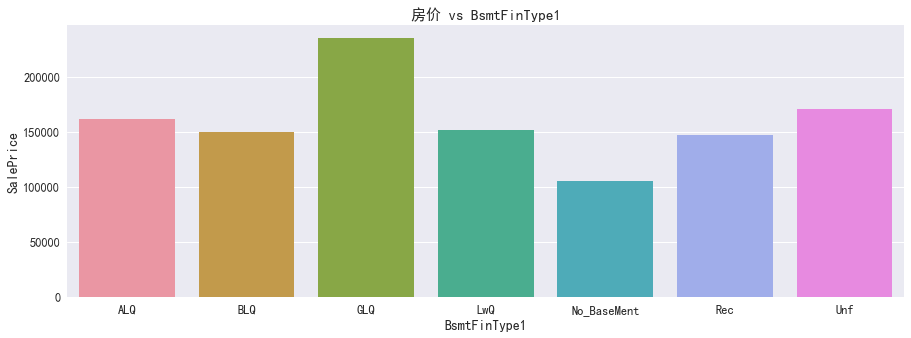

In [102]:
BsmtFinType1 = have_na[['BsmtFinType1','SalePrice']]
BsmtFinType1.loc[BsmtFinType1.BsmtFinType1.isnull(),'BsmtFinType1'] = 'No_BaseMent'
BsmtFinType1 = BsmtFinType1.groupby(['BsmtFinType1'],as_index = False).mean()


plt.figure(figsize=(15,5))
plt.xlabel('BsmtFinType1')
plt.ylabel(u'房价')
plt.title(u'房价 vs BsmtFinType1')

sns.barplot(x= 'BsmtFinType1',y = 'SalePrice',data = BsmtFinType1)

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


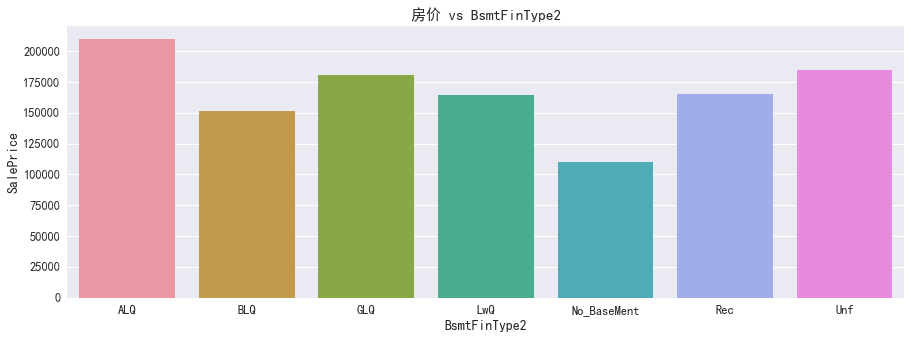

In [103]:
BsmtFinType2 = have_na[['BsmtFinType2','SalePrice']]
BsmtFinType2.loc[BsmtFinType2.BsmtFinType2.isnull(),'BsmtFinType2'] = 'No_BaseMent'
BsmtFinType2 = BsmtFinType2.groupby(['BsmtFinType2'],as_index = False).mean()


plt.figure(figsize=(15,5))
plt.xlabel('BsmtFinType2')
plt.ylabel(u'房价')
plt.title(u'房价 vs BsmtFinType2')

sns.barplot(x= 'BsmtFinType2',y = 'SalePrice',data = BsmtFinType2)

# BsmtCond

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


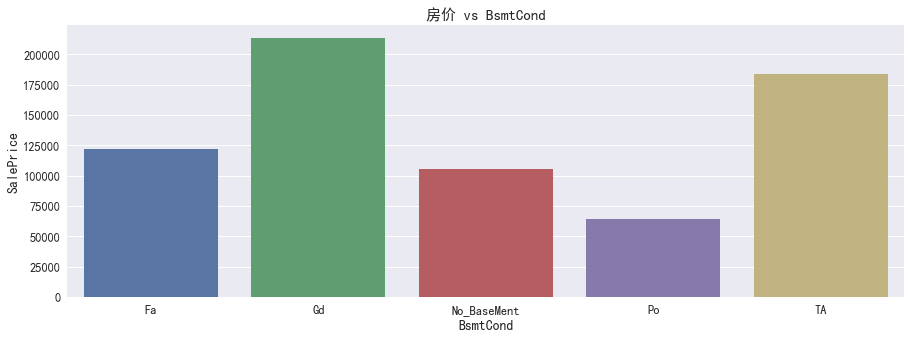

In [104]:
BsmtCond = have_na[['BsmtCond','SalePrice']]
BsmtCond.loc[BsmtCond.BsmtCond.isnull(),'BsmtCond'] = 'No_BaseMent'
BsmtCond = BsmtCond.groupby(['BsmtCond'],as_index = False).mean()


plt.figure(figsize=(15,5))
plt.xlabel('BsmtCond')
plt.ylabel(u'房价')
plt.title(u'房价 vs BsmtCond')

sns.barplot(x= 'BsmtCond',y = 'SalePrice',data = BsmtCond)

# MasVnrArea

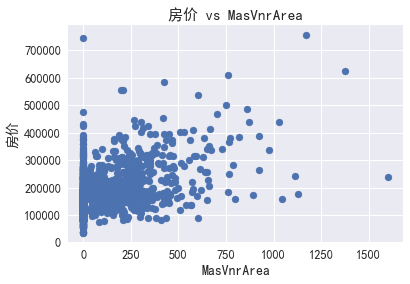

In [105]:
fig ,ax = plt.subplots()
plt.xlabel('MasVnrArea')
plt.ylabel(u'房价')
plt.title(u'房价 vs MasVnrArea')

ax.scatter(x = have_na['MasVnrArea'],y=have_na['SalePrice'])
plt.show()


# MasVnrType


C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


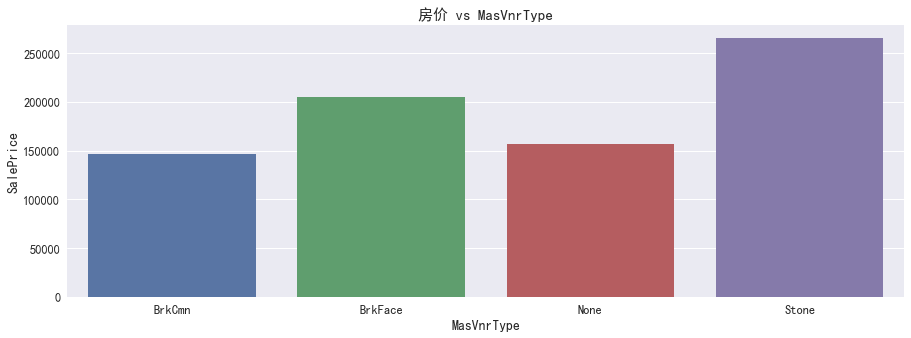

In [106]:
MasVnrType = have_na[['MasVnrType','SalePrice']]
MasVnrType.loc[MasVnrType.MasVnrType.isnull(),'MasVnrType'] = 'None'
MasVnrType = MasVnrType.groupby(['MasVnrType'],as_index = False).mean()


plt.figure(figsize=(15,5))
plt.xlabel('MasVnrType')
plt.ylabel(u'房价')
plt.title(u'房价 vs MasVnrType')

sns.barplot(x= 'MasVnrType',y = 'SalePrice',data = MasVnrType)

# Electrical

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


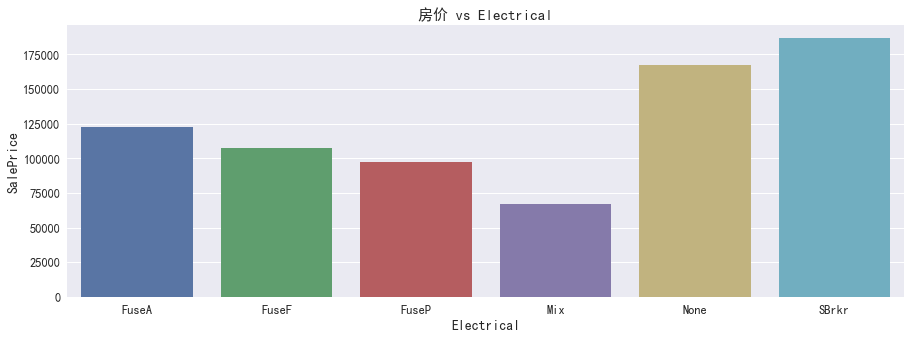

In [107]:
Electrical = have_na[['Electrical','SalePrice']]
Electrical.loc[Electrical.Electrical.isnull(),'Electrical'] = 'None'
Electrical = Electrical.groupby(['Electrical'],as_index = False).mean()


plt.figure(figsize=(15,5))
plt.xlabel('Electrical')
plt.ylabel(u'房价')
plt.title(u'房价 vs Electrical')

sns.barplot(x= 'Electrical',y = 'SalePrice',data = Electrical)

In [108]:
train_data_no_na = train_data.dropna(axis=1)

In [109]:
train_data_no_na_corr=train_data_no_na.corr()
train_data_no_na_corr_upper = train_data_no_na_corr['SalePrice'].loc[train_data_no_na_corr.SalePrice>0.5 ]

train_data_no_na_corr_low = train_data_no_na_corr['SalePrice'].loc[train_data_no_na_corr.SalePrice<-0.5]

train_data_no_na_corr = pd.concat([train_data_no_na_corr_upper,train_data_no_na_corr_low],axis= 0)

In [110]:
train_data_no_na_corr.sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

# 可以看出:
* <font color =red> OverallQual <font>
* <font color =red> GrLivArea        <font>
* <font color =red> GarageCars              <font>
* <font color =red> GarageArea       <font>
* <font color =red> TotalBsmtSF      <font>
* <font color =red> 1stFlrSF         <font>
* <font color =red> FullBath         <font>
* <font color =red> TotRmsAbvGrd     <font>
* <font color =red> YearBuilt            <font>    
* <font color =red> YearRemodAdd     <font>
    
    
    和房价均具有很强的相关性这些特征需要保留、再看看这些特征的相关性

In [119]:
train_data_no_na_corr.index

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

In [112]:
corr_feature = train_data[train_data_no_na_corr.index]

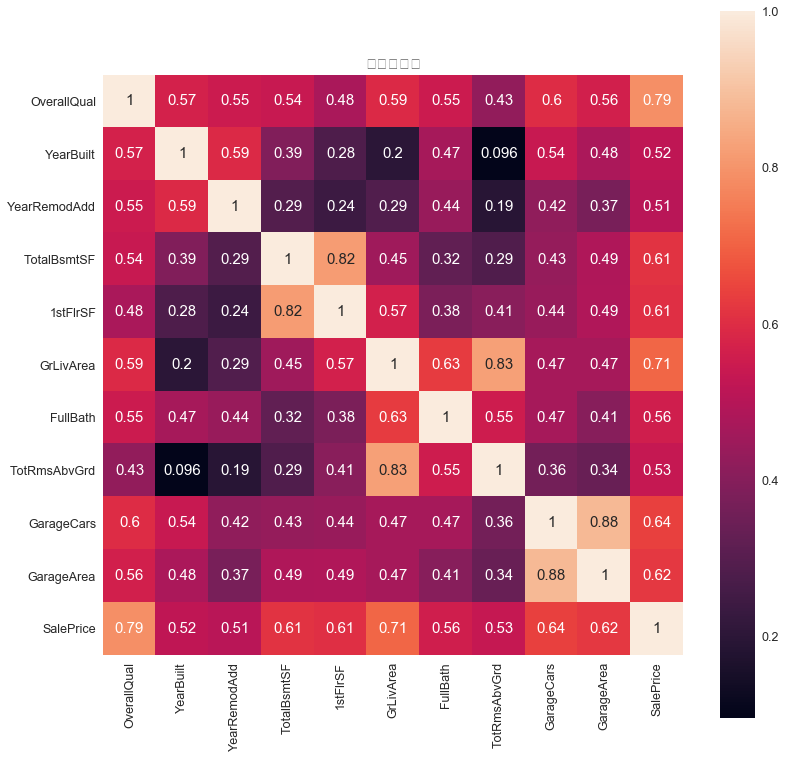

In [113]:
fig = plt.figure(figsize=(13,13))
plt.title(u'协方差矩阵')
sns.set(font_scale=1.25) 
sns.heatmap(corr_feature.corr(),annot=True,cbar=True,square=True)

In [122]:
train_data.corr()['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

#  下面进行特征工程

<font color = red>首先是缺失值的处理

In [126]:
na_sample.head(20)

,count,rate
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [133]:
# 首先合并train_data和test_data

train = pd.read_csv('data/train.csv')
test  = pd.read_csv('data/test.csv')
train_len = train.shape[0]
test_len = test.shape[0]
train = train.drop(['SalePrice'],axis = 1)
combine_data = pd.concat([train,test],axis = 0)
combine_data.shape

(2919, 80)

In [139]:
#首先处理PoolQC 对于NA 填充None 表示没有泳池,其他几项字符型的特征也是一样
combine_data['PoolQC']=combine_data['PoolQC'].fillna('None')
combine_data['MiscFeature']=combine_data['MiscFeature'].fillna('None')
combine_data['Alley']=combine_data['Alley'].fillna('None')
combine_data['Fence']=combine_data['Fence'].fillna('None')
combine_data['FireplaceQu']=combine_data['FireplaceQu'].fillna('None')
combine_data['GarageCond']=combine_data['GarageCond'].fillna('None')
combine_data['GarageType']=combine_data['GarageType'].fillna('None')
combine_data['GarageFinish']=combine_data['GarageFinish'].fillna('None')
combine_data['GarageQual']=combine_data['GarageQual'].fillna('None')
combine_data['BsmtExposure']=combine_data['BsmtExposure'].fillna('None')
combine_data['BsmtFinType2']=combine_data['BsmtFinType2'].fillna('None')
combine_data['BsmtFinType1']=combine_data['BsmtFinType1'].fillna('None')
combine_data['BsmtFinType1']=combine_data['BsmtFinType1'].fillna('None')
combine_data['BsmtCond']=combine_data['BsmtFinType1'].fillna('None')
combine_data['MasVnrType']=combine_data['MasVnrType'].fillna('None')
combine_data['Electrical']=combine_data['Electrical'].fillna(combine_data['Electrical'].mode()[0])

In [141]:
#下面处理有缺失值的数值特征
combine_data['LotFrontage']=combine_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
combine_data['GarageYrBlt']=combine_data['GarageYrBlt'].fillna(0)
combine_data['MasVnrArea']=combine_data['MasVnrArea'].fillna(0)

In [143]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    combine_data[col] = combine_data[col].fillna(0)

In [144]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    combine_data[col] = combine_data[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    combine_data[col] = combine_data[col].fillna('None')
combine_data = combine_data.drop(['Utilities'], axis=1)

In [153]:
combine_data["Functional"] = combine_data["Functional"].fillna("Typ")
combine_data['KitchenQual'] = combine_data['KitchenQual'].fillna(combine_data['KitchenQual'].mode()[0])
combine_data['Exterior1st'] = combine_data['Exterior1st'].fillna(combine_data['Exterior1st'].mode()[0])
combine_data['Exterior2nd'] = combine_data['Exterior2nd'].fillna(combine_data['Exterior2nd'].mode()[0])
combine_data['SaleType'] = combine_data['SaleType'].fillna(combine_data['SaleType'].mode()[0])
combine_data['MSSubClass'] = combine_data['MSSubClass'].fillna("None")
combine_data['MSZoning'] = combine_data['MSZoning'].fillna(combine_data['MSZoning'].mode()[0])

#   至上一步已经填充完成所有的缺失值
#   下面应该进行一些编码
   首先进行one-hot编码
   将一些实际上是catagory的数据转化

In [159]:
combine_data['MSSubClass'] = combine_data['MSSubClass'].astype(str)
combine_data['OverallQual'] = combine_data['OverallQual'].astype(str)
combine_data['OverallCond'] = combine_data['OverallCond'].astype(str)                                      

# 接下来将数据标准化

In [164]:
combine_data.drop(['Id'],axis=1,inplace=True)
numeric_featrue = combine_data.select_dtypes(exclude = 'object').columns

ValueError: labels ['Id'] not contained in axis

In [171]:
combine_data.drop(['YrSold','MoSold'],axis=1,inplace=True)
numeric_featrue = combine_data.select_dtypes(exclude = 'object').columns
numeric_featrue

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal'],
      dtype='object')

In [173]:
# 标准化数值数据
from sklearn import preprocessing
def standerlize(data,feature):
    stander = preprocessing.StandardScaler()
    data.loc[:,feature] = stander.fit_transform(data.loc[:,feature])

In [174]:
standerlize(combine_data,numeric_featrue)

In [177]:
#之后对整个数据进行one-hot编码
catagory_feature = combine_data.select_dtypes(include='object').columns

In [178]:
combine_dummies=pd.get_dummies(combine_data)

In [197]:
#至此已经将数据全部处理完成，将train和test分开

train_processed =  combine_dummies.iloc[0:train_len,:]
test_processed  =  combine_dummies.iloc[train_len:,:]
train_processed.to_csv("data/train_processed.csv")
test_processed.to_csv("data/test_processed.csv")

In [206]:
#下面建立评估模型
#还需对房价进行归一化处理
X_train = train_processed.values
y_train = np.log(train_data.pop('SalePrice'))
X_test  = test_processed.values

#  可以看出alpha在15的时候 可以达到最优值

Text(0.5,1,'Alpha vs CV Error')

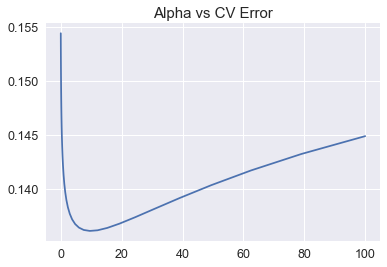

In [207]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alphas = np.logspace(-3,2,50)
test_scores = list()
for alpha  in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf,X_train,y_train,cv=10,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(alphas,test_scores)
plt.title('Alpha vs CV Error')

<font color =red> 采用RandomForest

In [217]:
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble

rf_clf = ensemble.RandomForestRegressor(random_state=42,verbose=1,n_jobs=-1)
rf_param_grid = {'n_estimators':[100,200,500],'max_features' :[0.1,0.3,0.5,0.7,0.9,0.99],'max_depth' :[10,100,200]}
rf_grid = GridSearchCV(rf_clf,rf_param_grid,n_jobs=-1,scoring='neg_mean_squared_error',
                       cv=10,verbose=1,refit=True)
rf_grid.fit(X_train,y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 12.7min finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.1s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=42, verbose=1, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 500], 'max_features': [0.1, 0.3, 0.5, 0.7, 0.9, 0.99], 'max_depth': [10, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [225]:
rf_grid_best = rf_grid.best_estimator_
rf_grid_best.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=200,
           max_features=0.3, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=42, verbose=1, warm_start=False)

In [230]:
bagging_clf = ensemble.BaggingRegressor(base_estimator=Ridge(15),random_state=42,verbose=1,n_jobs=-1)
bagging_param_grid = {'n_estimators':[10,50,100,200],'max_features' :[0.1,0.3,0.5,0.7,0.9,0.99]}
bagging_grid = GridSearchCV(bagging_clf,bagging_param_grid,n_jobs=-1,scoring='neg_mean_squared_error',
                       cv=10,verbose=1,refit=True)
bagging_grid.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  4.5min finished
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    1.7s remaining:    1.7s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    2.3s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=BaggingRegressor(base_estimator=Ridge(alpha=15, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=-1, oob_score=False,
         random_state=42, verbose=1, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 50, 100, 200], 'max_features': [0.1, 0.3, 0.5, 0.7, 0.9, 0.99]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [232]:
bagging_best = bagging_grid.best_estimator_
bagging_best.fit(X_train,y_train)

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    1.5s remaining:    1.5s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    2.2s finished


BaggingRegressor(base_estimator=Ridge(alpha=15, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
         bootstrap=True, bootstrap_features=False, max_features=0.99,
         max_samples=1.0, n_estimators=50, n_jobs=-1, oob_score=False,
         random_state=42, verbose=1, warm_start=False)

In [235]:
rf_predict = np.expm1(rf_grid_best.predict(X_test))
bagging_predict = np.expm1(rf_grid_best.predict(X_test))
final_predict =  (rf_predict+bagging_predict)/2

submission = pd.DataFrame({'id':test.index+1461,'SalePrice':final_predict},columns=['id','SalePrice'])
submission.to_csv('data/submission_data.csv',index=False,sep=',')


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished


#  最终Score 0.14